# NOM : BENMALEK
# PRENOM : ZOHIR
# PROMO : Master 1 MID 
# Presentation TP3
-------------------------------------------------------

### Importation des librairies 

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1 - Creation de l'image 

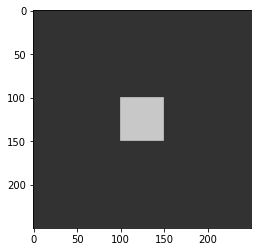

In [3]:
img = np.zeros((250, 250), dtype=np.uint8)
img.fill(50)

# Calculation des coordonnées du caré au milieu 
x = int((250 - 50) / 2)
y = int((250 - 50) / 2)

# Modification des couleurs du carée
img[y:y+50, x:x+50] = 200

# Affichage de l'image
plt.imshow(img, cmap='gray', vmin=0, vmax=255);


### 2 Filtres gradients

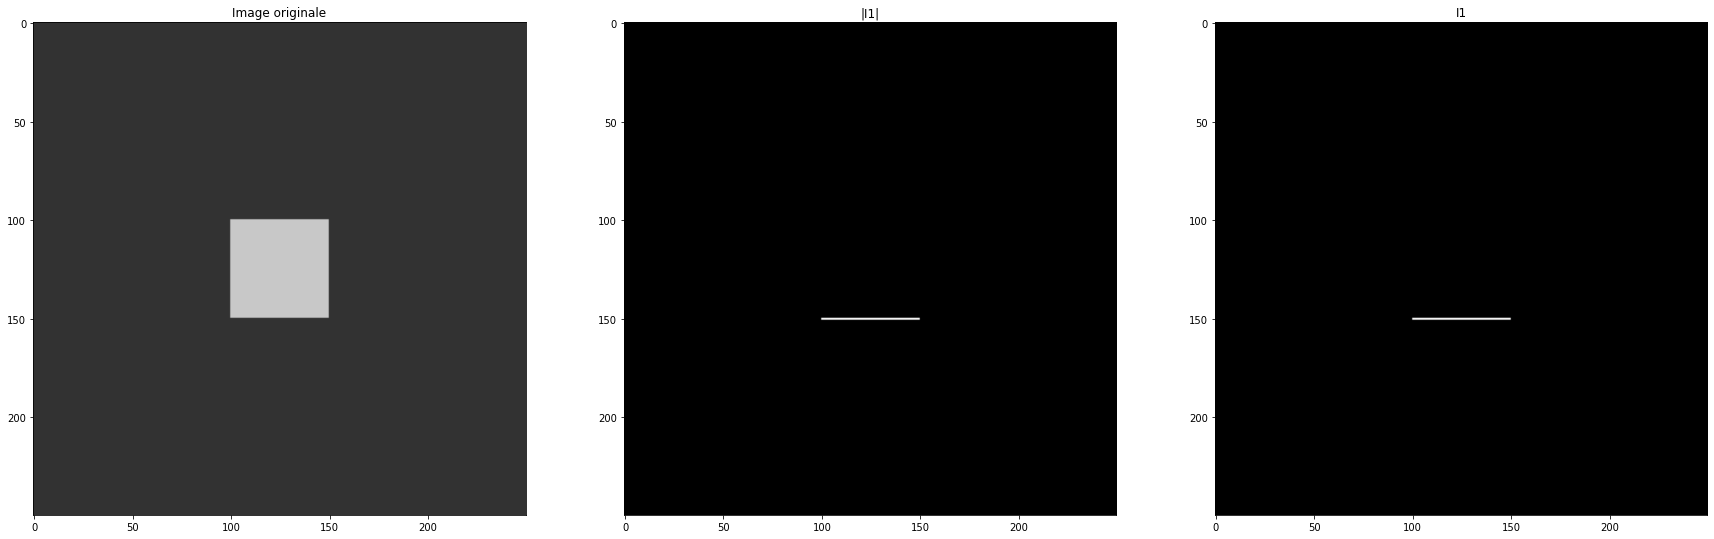

In [4]:
# Appliquer le filtre h1
h1 = np.array([1, -1])
I1 = cv.filter2D(img, -1, h1)

# Afficher l'image d'origine, le module et la phase de I1
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Image originale')

ax[1].imshow(np.abs(I1), cmap='gray')
ax[1].set_title('|I1|')

ax[2].imshow(I1, cmap='gray')
ax[2].set_title('I1')

plt.show()

Le filtre h1 détecte les contours dans la direction horizontale.

 Il est sensible aux transitions clair/foncé et foncé/claire.

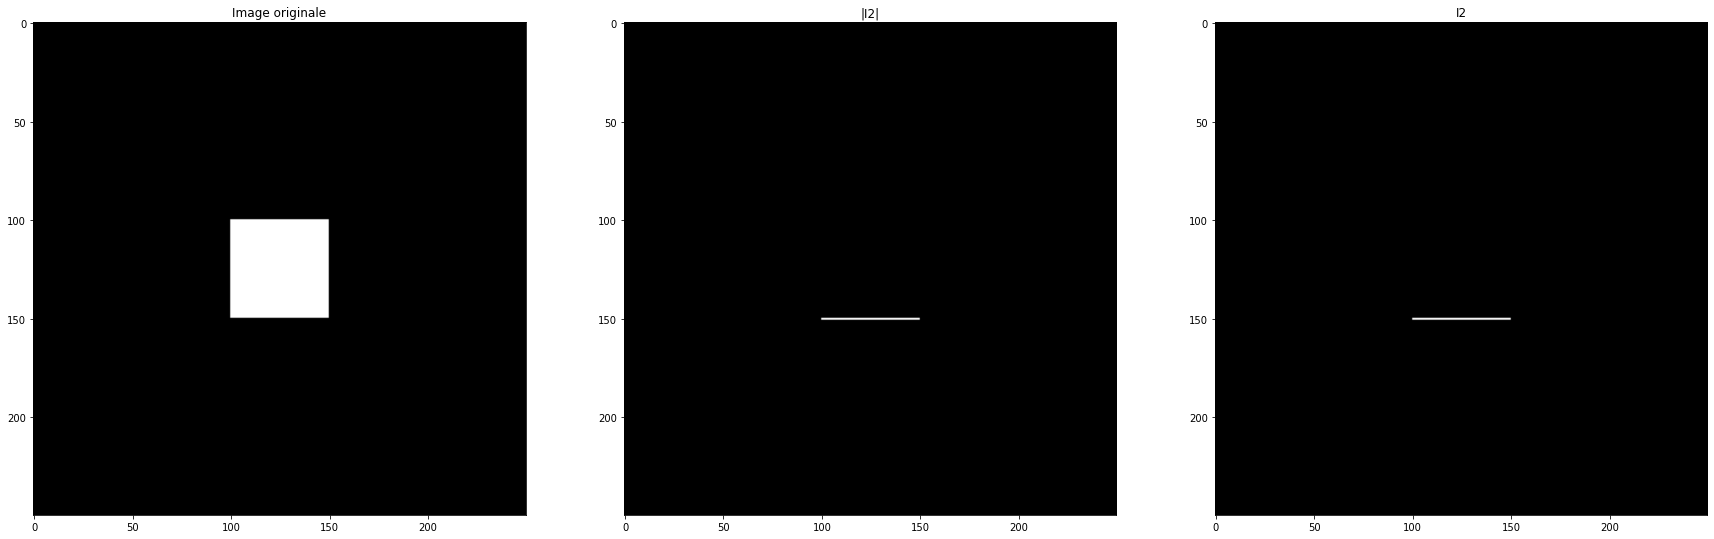

In [5]:
# Appliquer le filtre h2
h2 = np.array([[1], [-1]])
I2 = cv.filter2D(img, -1, h2)

# Afficher l'image d'origine, le module et la phase de I2
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image originale')

ax[1].imshow(np.abs(I2), cmap='gray')
ax[1].set_title('|I2|')

ax[2].imshow(I2, cmap='gray')
ax[2].set_title('I2')

plt.show()


Le filtre h2 détecte les contours diagonaux orientés vers la gauche. 

Il est sensible aux transitions foncé/clair et clair/foncé.

### 3 Filtres de Sobel

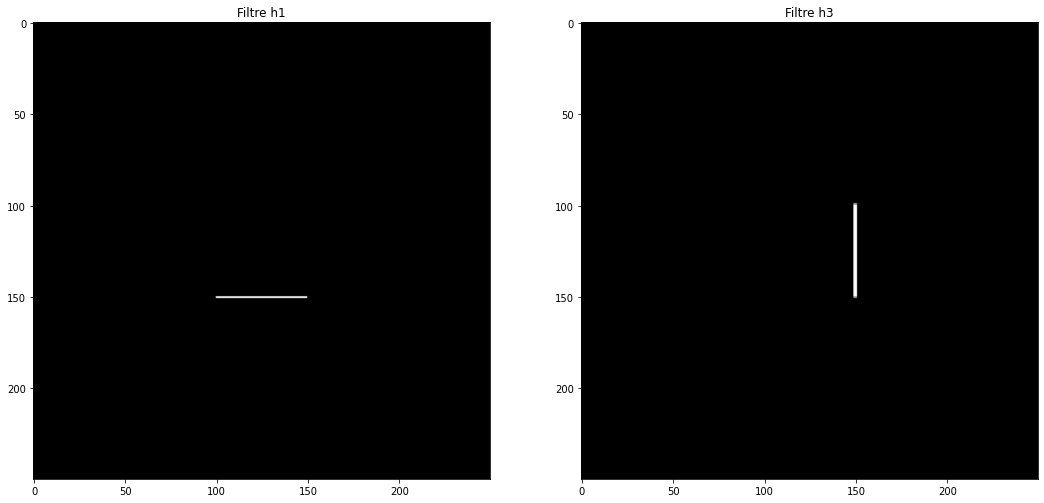

In [6]:
# Appliquer le filtre de Sobel horizontal
h3 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
I3 = cv.filter2D(img, -1, h3)

# Afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(18,10))

ax[0].imshow(I1, cmap='gray')
ax[0].set_title('Filtre h1')

ax[1].imshow(I3, cmap='gray')
ax[1].set_title('Filtre h3')

plt.show()

Le filtre h3 détecte les contours verticaux. 

Il est plus sensible que h1 et permet de détecter des contours plus fins.

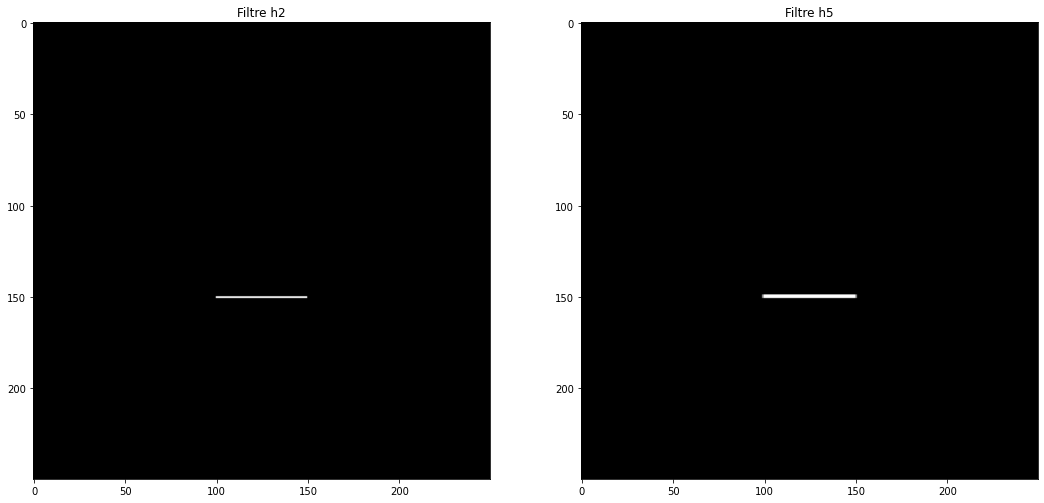

In [36]:
h5 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
I5 = cv.filter2D(img, -1, h5)


# Afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

ax[0].imshow(I2, cmap='gray')
ax[0].set_title('Filtre h2')

ax[1].imshow(I5, cmap='gray')
ax[1].set_title('Filtre h5')

plt.show()

Le filtre h5 détecte les contours diagonaux orientés vers la gauche. 

Il est plus sensible que h2 et permet de détecter des contours plus fins.

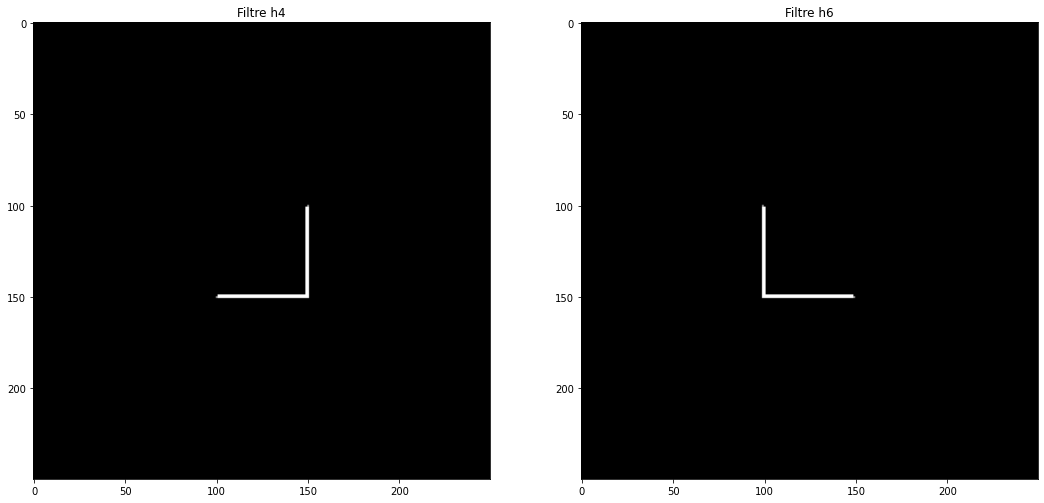

In [37]:
# Appliquer les filtres de Sobel combinés
h4 = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])
h6 = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
I4 = cv.filter2D(img, -1, h4)
I6 = cv.filter2D(img, -1, h6)

# Afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

ax[0].imshow(I4, cmap='gray')
ax[0].set_title('Filtre h4')

ax[1].imshow(I6, cmap='gray')
ax[1].set_title('Filtre h6')

plt.show()

Le filtre h4 est similaire à h3 mais avec des coefficients opposés .

Le filtre h6 est similaire à h5 mais avec des coefficients opposés .

En comparant les résultats, on peut observer que h4 et h6 sont similaires à h3 et h5 , mais avec des contours inversés en termes de clair/foncé.

### 4 - Filtre Laplacien

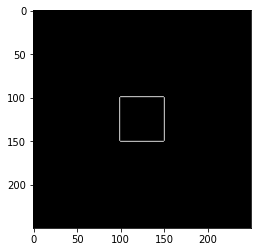

In [9]:
Laplacien = np.array([[0,1,0],[1,-4,1],[0,1,0]])/8
I7  = cv.filter2D(img, -1, Laplacien)
plt.imshow(I7,cmap="gray");

Le filtre Laplacien détecte les contours dans toutes les directions .

### 5 - Filtre LOG

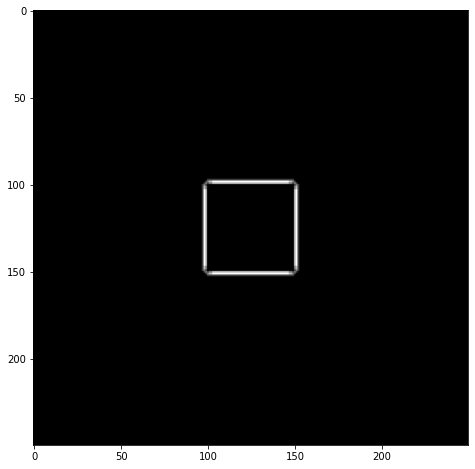

In [10]:
# Appliquer le filtre LOG
I_log = cv.GaussianBlur(img, (15, 15), sigmaX=1)
I8 = cv.filter2D(I_log, -1, Laplacien)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(I8,cmap="gray");

#### Faire varier σ

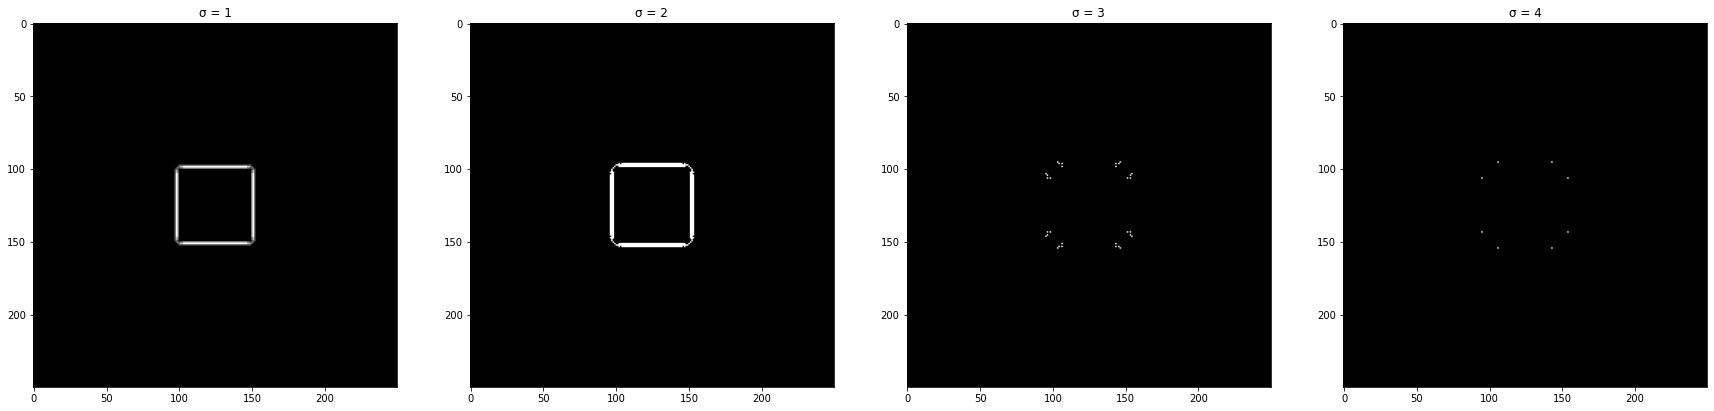

In [21]:

img_tab_LOG=[]
for i in range(1,5):
    I_log = cv.GaussianBlur(img, (15, 15), sigmaX=i)
    P = cv.filter2D(I_log, -1, Laplacien)
    img_tab_LOG.append(P)

fig, ax = plt.subplots(1,4,figsize=(30,8))
for i in range(4):
    ax[i].imshow(img_tab_LOG[i],cmap="gray")
    ax[i].set_title(f"σ = {i+1}")
plt.show()

#### Commentaire : 
plus σ est grand, plus les contours de grande échelle seront détectés, mais cela peut également entraîner une perte de précision pour les contours fins. 

Mais une valeur de σ trop petite peut ne pas détecter les contours de grande échelle et peut être sensible au bruit. 

#### Comparaison entre laplacien et le filtre LOG: 
Le filtre de Laplace est sensible au bruit et peut produire des résultats incohérents si l'image contient du brui mais le filtre LOG utilise un filtre gaussien pour traiter l'image, ce qui réduit l'effet du bruit et permet une détection plus précise des contours. 

### Exercice 2

In [25]:
# Lire 'pour.tif' 
image = cv.imread("/home/azarmalek/Desktop/Traitement_image/cameraman.tif",0)
C1=cv.filter2D(image, -1, h1)
C2= cv.filter2D(image, -1, h2)
C3=cv.filter2D(image, -1, h3)
C4= cv.filter2D(image, -1, h4)
C5=cv.filter2D(image, -1, h5)
C6= cv.filter2D(image, -1, h6)
C7=cv.filter2D(image, -1, Laplacien)

LOG = cv.GaussianBlur(image, (15, 15), sigmaX=1)
C8 = cv.filter2D(LOG, -1, Laplacien)



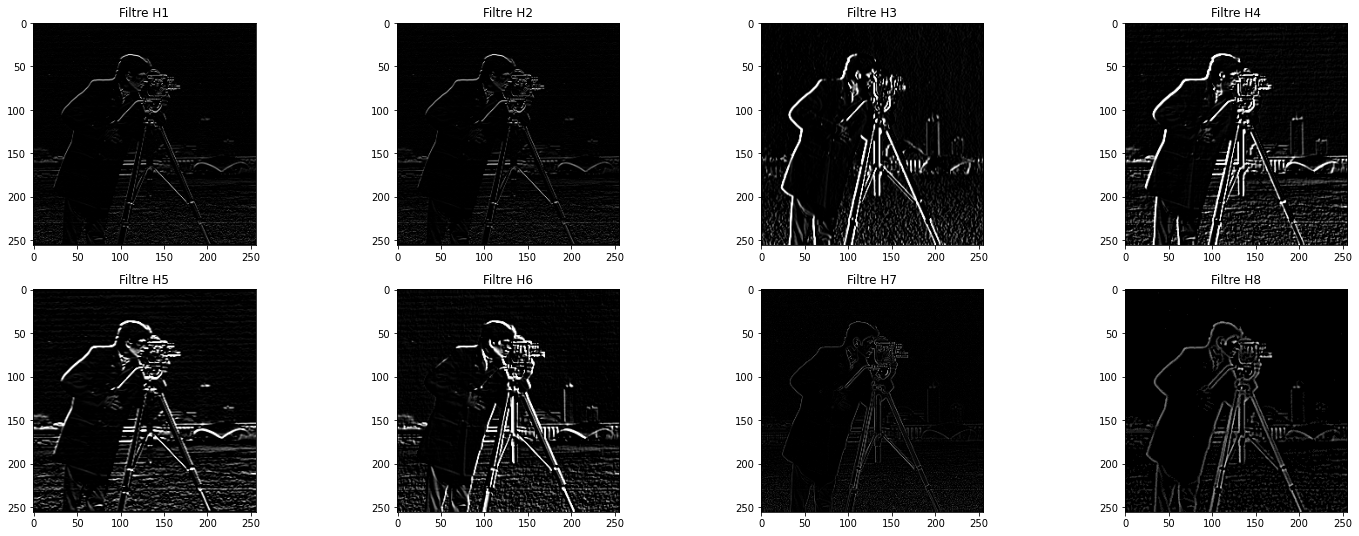

In [35]:
fig, ax = plt.subplots(2,4,figsize=(25,9))
ax[0][0].imshow(C1,cmap="gray")
ax[0][1].imshow(C2,cmap="gray")
ax[0][2].imshow(C3,cmap="gray")
ax[0][3].imshow(C4,cmap="gray")
ax[1][0].imshow(C5,cmap="gray")
ax[1][1].imshow(C6,cmap="gray")
ax[1][2].imshow(C7,cmap="gray")
ax[1][3].imshow(C8,cmap="gray")

ax[0][0].set_title("Filtre H1")
ax[0][1].set_title("Filtre H2")
ax[0][2].set_title("Filtre H3")
ax[0][3].set_title("Filtre H4")
ax[1][0].set_title("Filtre H5")
ax[1][1].set_title("Filtre H6")
ax[1][2].set_title("Filtre H7")
ax[1][3].set_title("Filtre H8")

plt.show()

#### Commentaire
Les 2 filtres H1 et H2 on eu le méme resultat .
Le filtre h3 détecte les contours dans la direction verticale et horizontale et est sensible aux transitions clair/foncé et foncé/clair.

Le filtre h4 détecte les contours dans la direction diagonale, de haut en bas à gauche et de bas en haut à droite. Le filtre de masque h6 détecte les contours dans la direction diagonale, de haut en bas à droite et de bas en haut à gauche.

Le filtre h5 détecte les contours dans la direction verticale et est sensible aux transitions clair/foncé et foncé/clair.

Le filtre h6 détecte les contours dans la direction diagonale, de haut en bas à droite et de bas en haut à gauche.

Le filtre h7 est sensible au bruit .

Le filtre h8 a fait une détection plus précise des contour par rapport a h7